<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
('Big Island',                                                       location  \
title                                                            
Dreamy Tropical Tree House                          Big Island   
Kealakekua Bay Bali Cottage -steps from Bay         Big Island   
Aloha Nature Lovers                                 Big Island   
Cozy apartment in Holualoa                          Big Island   
Cozy Ohana/Small apartment                          Big Island   
Treehouse at Kilauea Volcano                        Big Island   
Luxury Studio w/ Private Lanai                      Big Island   
ABSOLUTELY OCEAN FRONT CONDO                        Big Island   
Eco Hale Hawaii in the Rainforest Lots Of Aloha     Big Island   
Beautiful Condo in Downtown Kona                    Big Island   
Adventure Treehouse - As featured on HGTV!          Big Island   
Front row seats to the lava flow!                   Big Island   
Mokuna

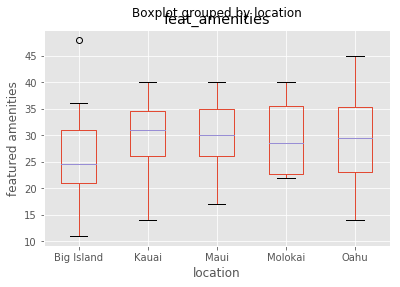

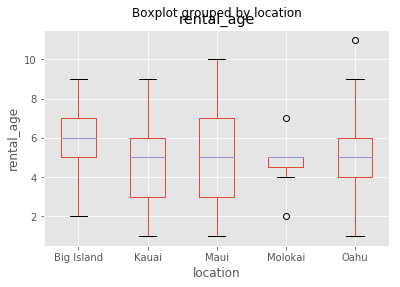

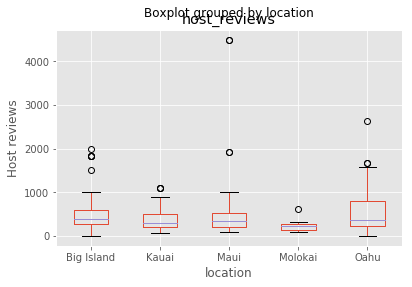

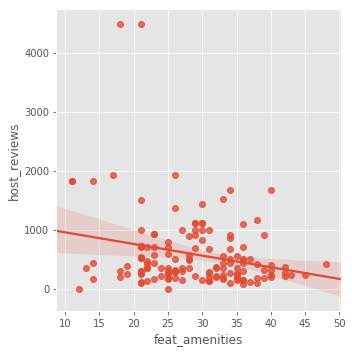

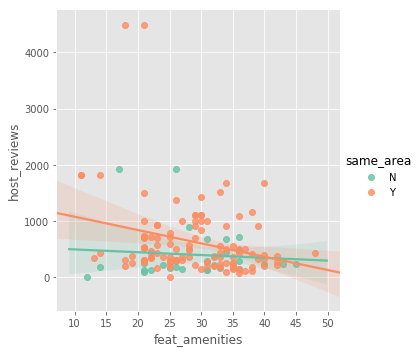

In [134]:
%matplotlib inline

import pandas as pd
import numpy as np


%matplotlib inline
plt.style.use('ggplot')



##### import csv
df = pd.read_csv('airbnb1.csv',index_col=0)

##### check
df.head


### Freq of NA

df.isnull()


#missing in rows and columns
missing_rows = df.isnull().sum(axis=1)>0
df.loc[missing_rows]


missing_columns = df.isnull().sum(axis=0)>0
df.loc[:,missing_columns]


#drop all rows and column with all NA
df.dropna(axis=0, how='all')


#Analysis of Islands
group = df.groupby('location')

print(type(group))

for item in group:
    print (item)
    
    
##### VISUAL ANALYSES #######


#### SUMMARY
### boxplots   
df_score = df[['location', 'feat_amenities']]
df_score.boxplot(by='location', column='feat_amenities')
plt.ylabel('featured amenities'

df_score = df[['location', 'rental_age']] 
df_score.boxplot(by='location', column='rental_age')
plt.ylabel('rental_age')
           
df_score = df[['location', 'rental_reviews']] 
df_score.boxplot(by='location', column='rental_reviews')
plt.ylabel('Rental reviews')
           
df_island = df[['location', 'rates']] 
df_island.boxplot(by='location', column='rates')
plt.ylabel('Rates')
           
           
# convert objects to numeric values
df.rates = pd.to_numeric(df.rates, errors='coerce')

df
                      
# correlations by island

group = df.groupby('location')
group.corr(method='pearson')
           
##### PLOTS #####
           
# Plot 1 State of Hawaii, rental rates vs. rental reviews 
           
sns.lmplot("rental_reviews", "rates",df)
           
# Plot 2 State of Hawaii, rental rates vs. rental reviews for Superhosts and non-superhosts
           
sns.lmplot("rental_reviews","rates", df, hue="Superhost", palette="Set2")
           
           
# Plot 3 State of Hawaii, rental rates vs. rental reviews by island
           
sns.lmplot("rental_reviews","rates", df, hue="location", palette="Set2")           
